In [87]:
import numpy as np


Version in numpy

In [19]:
X = np.array([1,2,3,4,5])
Y = np.array([3,6,9,12,15])

In [21]:
def forward(X,Y, w):
    return np.mean((X*w -Y)**2)

In [22]:
def backward(X,Y,w):
    return np.mean(2*(w*X-Y)*X)

In [50]:
n_epochs = 10
learning_rate = 0.05

In [51]:
w= 0.1
for n_it in range(n_epochs):
    L = forward(X,Y,w)
    print(f"cost : {L},      w : {w}")
    dw = backward(X,Y,w)
    w -= learning_rate*dw 
    

cost : 92.50999999999999,      w : 0.1
cost : 0.9251000000000001,      w : 3.29
cost : 0.009250999999999945,      w : 2.971
cost : 9.250999999999483e-05,      w : 3.0029
cost : 9.251000000006848e-07,      w : 2.99971
cost : 9.251000000025909e-09,      w : 3.000029
cost : 9.251000000886199e-11,      w : 2.9999971
cost : 9.250999998825623e-13,      w : 3.00000029
cost : 9.251000124520635e-15,      w : 2.999999971
cost : 9.251001530862408e-17,      w : 3.0000000029000002


Version in pytorch

In [120]:
import torch
import torch.nn as nn

In [121]:
def forward_pt(X,w):
    return X*w

In [122]:
X = torch.tensor([[1],[2],[3],[4],[5]], dtype = torch.float32)
Y = torch.tensor([[3],[6],[9],[12],[15]], dtype = torch.float32)
input_f = 1
output_f = 1

In [114]:
model = nn.Linear(input_f, output_f, bias=False)

In [115]:
n_epochs = 10
learning_rate = 0.05

In [116]:
loss = nn.MSELoss(reduction='mean')
#w = torch.tensor(0.1, dtype = torch.float32, requires_grad=True)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [119]:
for n_it in range(n_epochs):
    y_pred = model(X)
    L = loss(y_pred, Y) # forward
    L.backward()     # backward
    optimizer.step()
    optimizer.zero_grad()
    [w] = model.parameters()  
    print(f"cost : {L},      w : {w[0][0].item()}")

cost : 0.0,      w : 3.0
cost : 0.0,      w : 3.0
cost : 0.0,      w : 3.0
cost : 0.0,      w : 3.0
cost : 0.0,      w : 3.0
cost : 0.0,      w : 3.0
cost : 0.0,      w : 3.0
cost : 0.0,      w : 3.0
cost : 0.0,      w : 3.0
cost : 0.0,      w : 3.0


Redo all again

In [23]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [17]:
X = torch.tensor([[1],[2],[4],[8]], dtype=torch.float32)
Y = torch.tensor([[10.3],[19.5],[40.1],[79.6]], dtype=torch.float32)
n_input_feat  = 1
n_output_feat  = 1

In [18]:
model = nn.Linear(n_input_feat, n_output_feat, bias = False)

In [19]:
L = nn.MSELoss(reduction = 'mean')

In [20]:
learning_rate = 0.01
optim = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [21]:
n_epochs = 20

In [22]:
for n_it in range(n_epochs):
    y_pred = model(X)
    l = L(y_pred, Y)
    l.backward()
    optim.step()
    optim.zero_grad()
    [w] = model.parameters()  
    print(f"cost : {l},      w : {w[0][0].item()}")

cost : 1726.6856689453125,      w : 4.775795936584473
cost : 570.9466552734375,      w : 6.978582382202148
cost : 188.8304901123047,      w : 8.245184898376465
cost : 62.4932975769043,      w : 8.973481178283691
cost : 20.72307777404785,      w : 9.392251968383789
cost : 6.912786483764648,      w : 9.633045196533203
cost : 2.3467624187469482,      w : 9.771500587463379
cost : 0.8371288180351257,      w : 9.851112365722656
cost : 0.33800551295280457,      w : 9.896889686584473
cost : 0.1729806661605835,      w : 9.923211097717285
cost : 0.11842036247253418,      w : 9.938345909118652
cost : 0.10038111358880997,      w : 9.947049140930176
cost : 0.09441638737916946,      w : 9.95205307006836
cost : 0.09244449436664581,      w : 9.954930305480957
cost : 0.091792531311512,      w : 9.956584930419922
cost : 0.0915769413113594,      w : 9.957536697387695
cost : 0.09150565415620804,      w : 9.958083152770996
cost : 0.09148211777210236,      w : 9.95839786529541
cost : 0.09147430956363678,   

In [10]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self,x):
        return self.lin(x)

In [25]:
predicted = model(X).detach().numpy()

In [27]:
predicted

array([[ 9.958683],
       [19.917366],
       [39.834732],
       [79.669464]], dtype=float32)

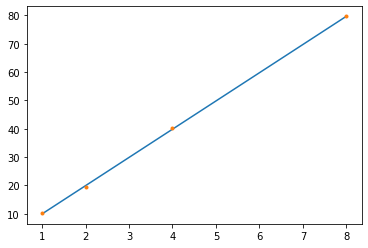

In [30]:
fig, ax = plt.subplots()
ax.plot(X,predicted)
ax.plot(X, Y, '.')